In [1]:
import sys
import os

notebook_dir = os.path.dirname(os.path.abspath("__file__"))  # Get the current notebook directory
parent_dir = os.path.dirname(notebook_dir)  # Get the parent directory
sys.path.insert(0, parent_dir) 

In [2]:
parent_dir

'/Users/alex/Desktop/uchc_work/repos/Biosimulators_simularium'

In [3]:
from biosimulators_simularium.simulation_data import generate_output

In [4]:
working_dir = 'tests/fixtures/crowding'

In [5]:
output = generate_output(dir_fp=working_dir)

Libsmoldyn notification from smolRunSim: Simulation complete


In [6]:
from biosimulators_simularium.geometry import read_geometry


geo = read_geometry(os.path.join(working_dir, 'model.txt'), output['simulation'], output['coordinates'])

geo

['sphere']
generated sphere


In [6]:
import pyvista as pv
from pyvista import examples 
from biosimulators_simularium.convert import generate_interpolated_mesh

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


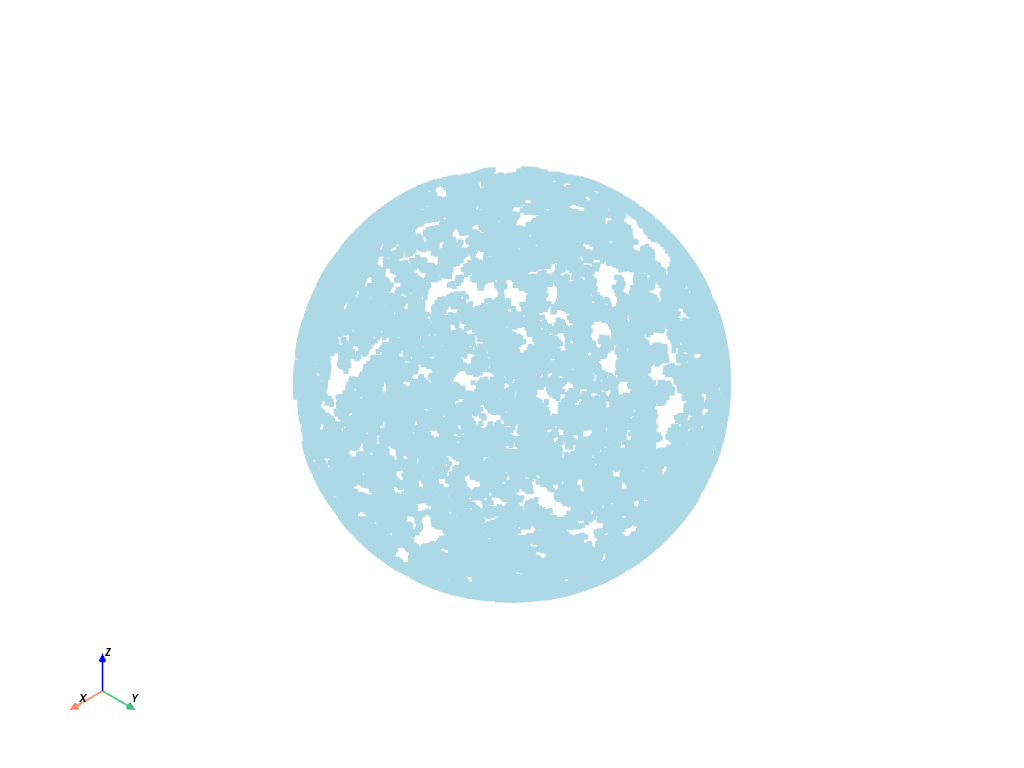

In [7]:
mesh = pv.read('OUTPUT/simulation-points.vtp')

mesh.plot()

In [ ]:
mesh.reconstruct_surface().plot()

In [ ]:
mesh = generate_interpolated_mesh(mol_output=output)


mesh.plot()

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


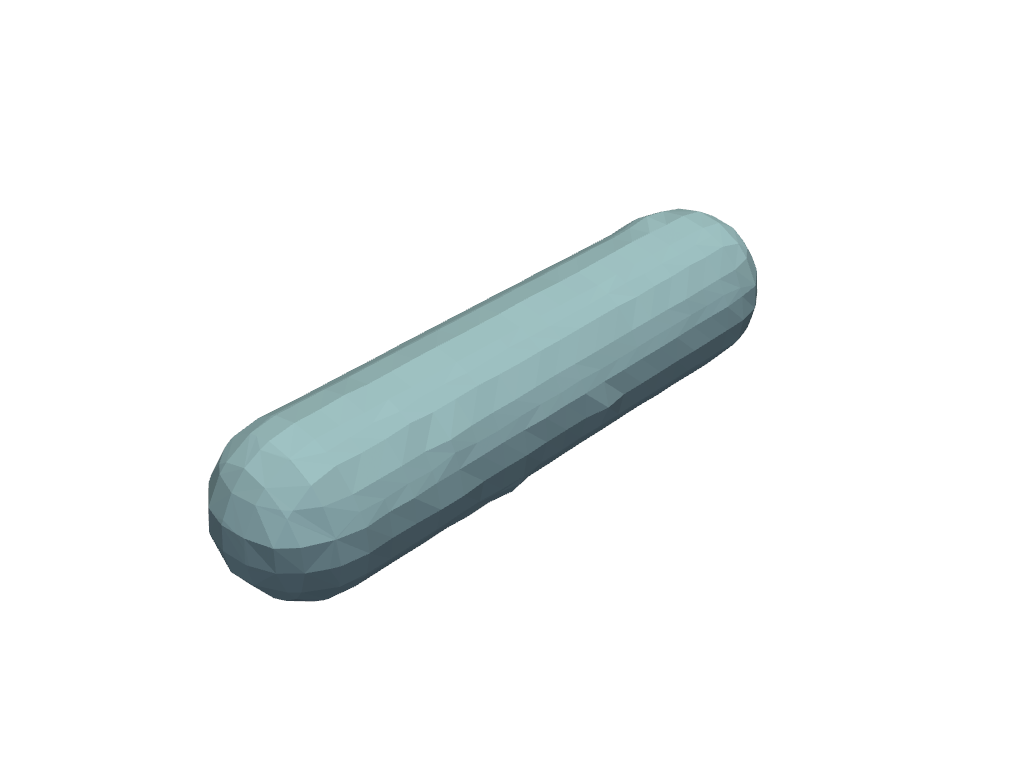

In [8]:
points = pv.PolyData(output.get('coordinates')[:1000])

surface = points.reconstruct_surface()

p = pv.Plotter()

inter = surface.interpolate(points)

p.add_mesh(surface)
p.show()

In [21]:
dir(pv.Plotter())

TypeError: BasePlotter.add_mesh() missing 1 required positional argument: 'mesh'

In [9]:
slices = inter.slice_orthogonal(x=0, y=0)

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


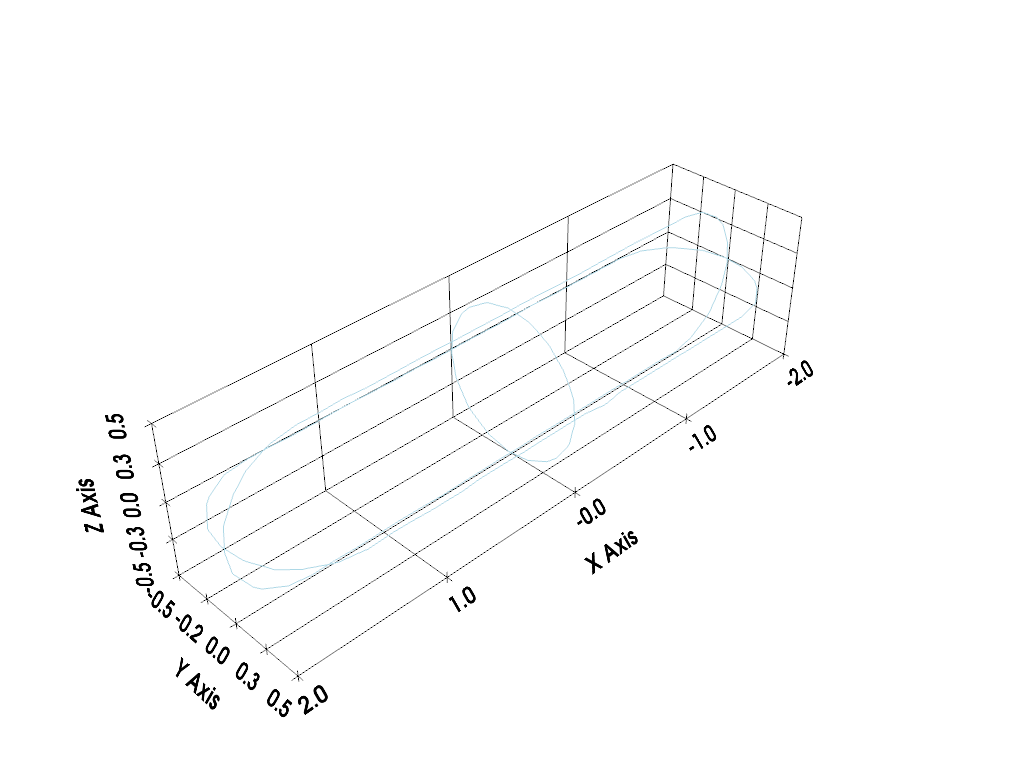

In [13]:

dargs = dict(cmap='gist_ncar_r')

p = pv.Plotter()
p.add_mesh(slices, **dargs)
p.show_grid()
p.show()

In [19]:
bounds = output['simulation'].getBoundaries()

boundsLow = [int(v) for v in bounds[0]]
boundsHigh = [int(v) for v in bounds[1]]

coords = output['coordinates']  # [:1000]
points = pv.PolyData(coords)


In [14]:
dir(output['simulation'])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__todisp_text__',
 'accuracy',
 'addBidirectionalReaction',
 'addBox',
 'addCommand',
 'addCommandStr',
 'addCompartment',
 'addCompartmentLogic',
 'addCompartmentMolecules',
 'addCompartmentPoint',
 'addCompartmentSurface',
 'addCylinder',
 'addDisk',
 'addGraphics',
 'addHemisphere',
 'addLattice',
 'addLatticeMolecules',
 'addLatticePort',
 'addLatticeReaction',
 'addLatticeSpecies',
 'addMolList',
 'addMoleculePerBox',
 'addMolecules',
 'addOutputData',
 'addOutputFile',
 'addPanel',
 'addPanelNeighbor',
 'addPartition',
 'addPath2D',
 'addPort',
 'addPortMolecule',
 'addReaction',
 'addRectangle',
 'addSolutionMolecules',
 'addSpec

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


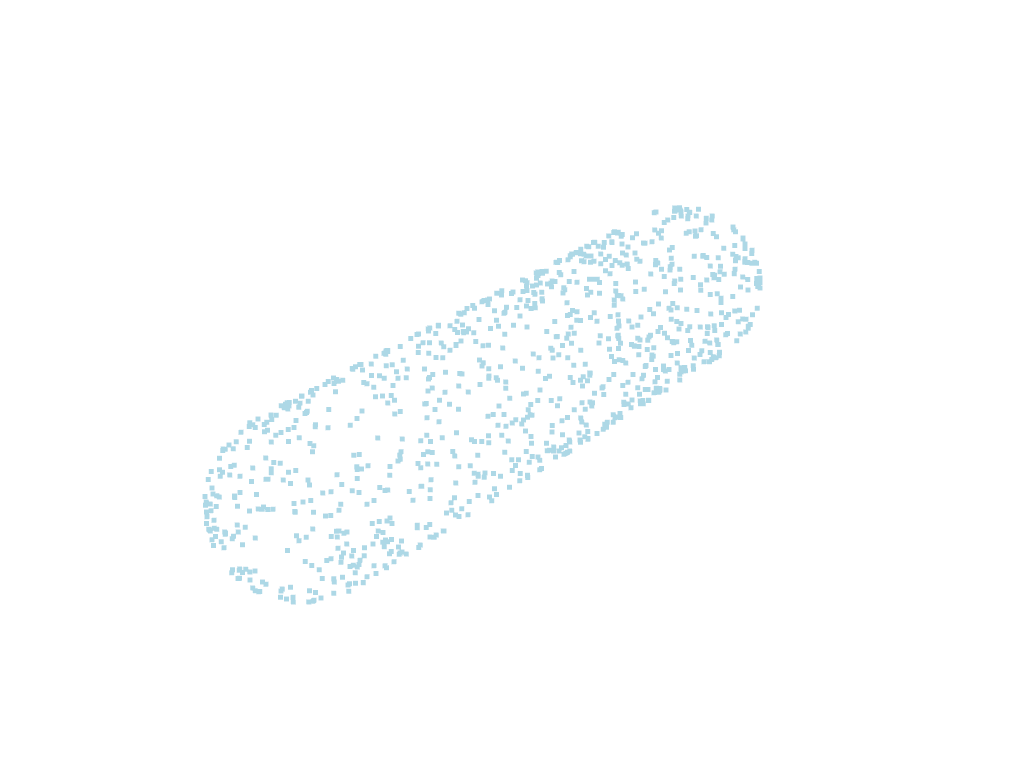

In [12]:
p = pv.Plotter()
p.add_mesh(points)
p.show()

In [26]:
import pyvista as pv 

dargs = dict(cmap="coolwarm", clim=[0, 300], scalars="temperature (C)")
cpos = [
    (364280.5723737897, 4285326.164400684, 14093.431895014139),
    (337748.7217949739, 4261154.45054595, -637.1092549935128),
    (-0.29629216102673206, -0.23840196609932093, 0.9248651025279784),
]


class Capsule:
    def __init__(self, cyl: pv.Cylinder, *spheres):
        self.cyl = cyl 
        self.spheres = [*spheres]
    
    def construct(self):
        pass 

def construct_capsule(R=0.5, L_PARAM=1) -> pv.PolyData:
    """TODO: Encode json and derive the parameters automatically from the simulation instance."""
    # Create cylinder
    cylinder = pv.Cylinder(center=(0, 0, 0), radius=R, height=L_PARAM * 2)
    # Create hemispheres
    hemisphere1 = pv.SolidSphere(outer_radius=R, center=(L_PARAM, 0, 0))
    hemisphere2 = pv.SolidSphere(outer_radius=R, center=(-L_PARAM, 0, 0))
    return cylinder.merge(hemisphere1).merge(hemisphere2)


In [10]:
coords = output.get('coordinates', [])

In [7]:
from biosimulators_simularium.simulation_data import get_simulation_boundaries


get_simulation_boundaries(output.get('simulation'))

TypeError: list.append() takes exactly one argument (3 given)

In [26]:
sim = output.get('simulation')

def get_simulation_boundaries(simulation):
    bounds = []
    boundaries = dict(zip(['x', 'y', 'z'], [[], [], []]))
    bounds_from_file = simulation.getBoundaries()
    for b in bounds_from_file:
        boundaries['x'].append(b[0])
        boundaries['y'].append(b[1])
        boundaries['z'].append(b[2])
    for k in boundaries.keys():
        axis = boundaries[k]
        for val in axis:
            bounds.append(val)
    return bounds 
    
    
    
get_simulation_boundaries(sim)

[-2.0, 2.0, -0.5, 0.5, -0.5, 0.5]

In [30]:
from biosimulators_simularium.geometry import get_config_geometry, read_geometry
get_config_geometry('/Users/alex/Desktop/uchc_work/repos/Biosimulators_simularium/biosimulators_simularium/tests/fixtures/crowding/model.txt')

ImportError: cannot import name 'read_geometry' from 'biosimulators_simularium.geometry' (/Users/alex/Desktop/uchc_work/repos/Biosimulators_simularium/biosimulators_simularium/geometry.py)

In [23]:
import numpy as np 

b = sim.getBoundaries()

boundz = []
h = b[1]
l = b[0]
for n in range(7):
    boundz.append(l[n])
    boundz.append(h[n])

boundz

IndexError: list index out of range

In [37]:
dfrom vtk import vtkCylinder, vtkSphere, vtkImplicitBoolean, vtkSampleFunction, vtkContourFilter, vtkPolyDataMapper, vtkActor, vtkPolyDataWriter, vtkPointData
import vtk 


def write_minE_capsule(coords, vtk_fp: str):
    """Create the geometry primitives and extract the surface."""
    # Create the geometry of the surface
    cyl = vtkCylinder()
    hemi1 = vtkSphere()
    hemi2 = vtkSphere()
    hemi1.SetCenter(-1, 0, 0)
    hemi2.SetCenter(1, 0, 0)
    
    # Combine the shapes using vtkImplicitBoolean
    ib = vtkImplicitBoolean()
    ib.SetOperationTypeToUnion()
    ib.AddFunction(hemi1)
    ib.AddFunction(hemi2)
    ib.AddFunction(cyl)
    
    # Sample the combined shape
    sample = vtkSampleFunction()
    sample.SetImplicitFunction(ib)
    sample.SetModelBounds(-2, 2, -0.5, 0.5, -0.5, 0.5)  # TODO: make this dynamically read-in.
    sample.SetSampleDimensions(40, 40, 40)
    # sample.ComputeNormalsOff()
    
    # Extract the surface
    surface = vtkContourFilter()
    surface.SetInputData(sample.GetOutput())
    # surface.SetValue(0, 0.0)
    
    """Create polydata object from molecule coordinates via points and relative vertices."""
    # Create points and vertices for the molecule data
    points = vtk.vtkPoints()
    vertices = vtk.vtkCellArray()
    
    for coord in coords:
        point_id = points.InsertNextPoint(coord)
        vertices.InsertNextCell(1)
        vertices.InsertCellPoint(point_id)
    
    # Create a polydata object and set the points and vertices
    polydata = vtk.vtkPolyData()
    polydata.SetPoints(points)
    polydata.SetVerts(vertices)
    
    """Interpolate points and surface"""
    # Combine surface and molecule data
    appendFilter = vtk.vtkAppendPolyData()
    appendFilter.AddInputData(surface.GetOutput())
    appendFilter.AddInputData(polydata)
    appendFilter.Update()
    
    
    """Write the append filter output to file"""
    # Write the combined data to a file
    writer = vtk.vtkPolyDataWriter()
    writer.SetFileName(vtk_fp)
    writer.SetInputData(appendFilter.GetOutput())
    return writer.Write()




"""Read vtk and return read-in polydata object"""
reader = vtk.vtkPolyDataReader()
reader.SetFileName(vtk_fp)
reader.Update()
# Get the output (vtkPolyData) from the reader
polyData = reader.GetOutput()


"""Optional: slice data"""
# Accessing data from the vtkPolyData
# For example, getting points
points = polyData.GetPoints()
numberOfPoints = points.GetNumberOfPoints()
print("Number of points:", numberOfPoints)


"""Plot data in notebook"""
# Create a mapper for the polydata
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputData(polyData)

# Create an actor to hold the geometry
actor = vtk.vtkActor()
actor.SetMapper(mapper)

# Create a renderer
renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(0.1, 0.2, 0.4)  # Set background color

# Create a render window
renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

# Create a render window interactor
renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)

# Initialize the render window interactor and start the rendering loop
renderWindow.Render()
renderWindowInteractor.Initialize()
renderWindowInteractor.Start()

In [39]:
type(polyData)

vtkmodules.vtkCommonDataModel.vtkPolyData

In [41]:
from biosimulators_simularium.geometry.data_model import CapsuleSurface, CapsulePoints, Capsule

surface = CapsuleSurface()
points = CapsulePoints(coords)
capsule = Capsule(surface, points)


In [42]:
from biosimulators_simularium.geometry.io import write_capsule_vtk_file, read_vtk_file


write_capsule_vtk_file('/Users/alex/Desktop/simulation.vtk', capsule)



1

In [44]:
data = read_vtk_file('/Users/alex/Desktop/simulation.vtk')
data.GetNumberOfPoints()


4043494

In [46]:
sim = output['simulation']
dir(sim)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__todisp_text__',
 'accuracy',
 'addBidirectionalReaction',
 'addBox',
 'addCommand',
 'addCommandStr',
 'addCompartment',
 'addCompartmentLogic',
 'addCompartmentMolecules',
 'addCompartmentPoint',
 'addCompartmentSurface',
 'addCylinder',
 'addDisk',
 'addGraphics',
 'addHemisphere',
 'addLattice',
 'addLatticeMolecules',
 'addLatticePort',
 'addLatticeReaction',
 'addLatticeSpecies',
 'addMolList',
 'addMoleculePerBox',
 'addMolecules',
 'addOutputData',
 'addOutputFile',
 'addPanel',
 'addPanelNeighbor',
 'addPartition',
 'addPath2D',
 'addPort',
 'addPortMolecule',
 'addReaction',
 'addRectangle',
 'addSolutionMolecules',
 'addSpec

In [83]:
from biosimulators_simularium.io import read_smoldyn_simulation_configuration 

modelFp = '/Users/alex/Desktop/uchc_work/repos/Biosimulators_simularium/biosimulators_simularium/tests/fixtures/MinE/model.txt'
config = read_smoldyn_simulation_configuration('/Users/alex/Desktop/uchc_work/repos/Biosimulators_simularium/biosimulators_simularium/tests/fixtures/MinE/model.txt')

config

['# File Min1.txt, by Steve Andrews, 11/2009.',
 '# E. coli Min system, based on Huang, Meir, Wingreen (HMW)',
 '# This file is HMW system exactly, plus surface diffusion',
 '# units are micron, second',
 '',
 'define D_D\t\t2.5\t# MinD diffusion coefficient (um^2/s)',
 'define D_E\t\t2.5\t# MinE diffusion coefficient (um^2/s)',
 'define D_d\t\t0.01\t# MinD_ATP(front) diff. coeff. (um^2/s)',
 'define D_de\t\t0.01\t# MinDMinE(front) diff. coeff. (um^2/s)',
 'define SIGMA_D_D2T\t1\t# MinD phosphorylation rate (s^-1)',
 'define SIGMA_D\t\t0.025\t# MinD_ATP adsorption coeff. (um/s)',
 'define SIGMA_dD\t\t0.0015\t# cooperative adsorption coeff. (um^3/s)',
 'define SIGMA_de\t\t0.7\t# desorption rate of MinDMinE (s^-1)',
 'define SIGMA_E\t\t0.093\t# MinE binding to surface-bound MinD (um^3/s)',
 '',
 'define UNBINDRAD\t0.01\t# MinD separation on surface (um)',
 '',
 'define R\t\t0.5\t# cell radius',
 'define L_PARAM\t\t2\t# half of cell length',
 'define L_PARAM2\t\t1.5\t# half of cell length

In [84]:
from typing import * 


def get_config_panels(fp: str): 
    panels = []
    config = read_smoldyn_simulation_configuration(fp)
    for line in config:
        if line.startswith('panel'):
            panels.append(line)
    return panels


def get_panel_geometry(panels: List[str]):
    geometries = []
    for p in panels:
        panel = p.split()
        geometries.append(panel[1])
    return geometries


def get_config_geometry(fp: str) -> List[str]:
    """Return a list of primitive geometry types for all panels in a given smoldyn configuration file."""
    panels = get_config_panels(fp)
    return get_panel_geometry(panels)

In [85]:
g = get_config_geometry(modelFp.replace('MinE', 'crowding'))
g

['sphere']

In [23]:
slices = inter.slice_orthogonal(x=0, y=0)


/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


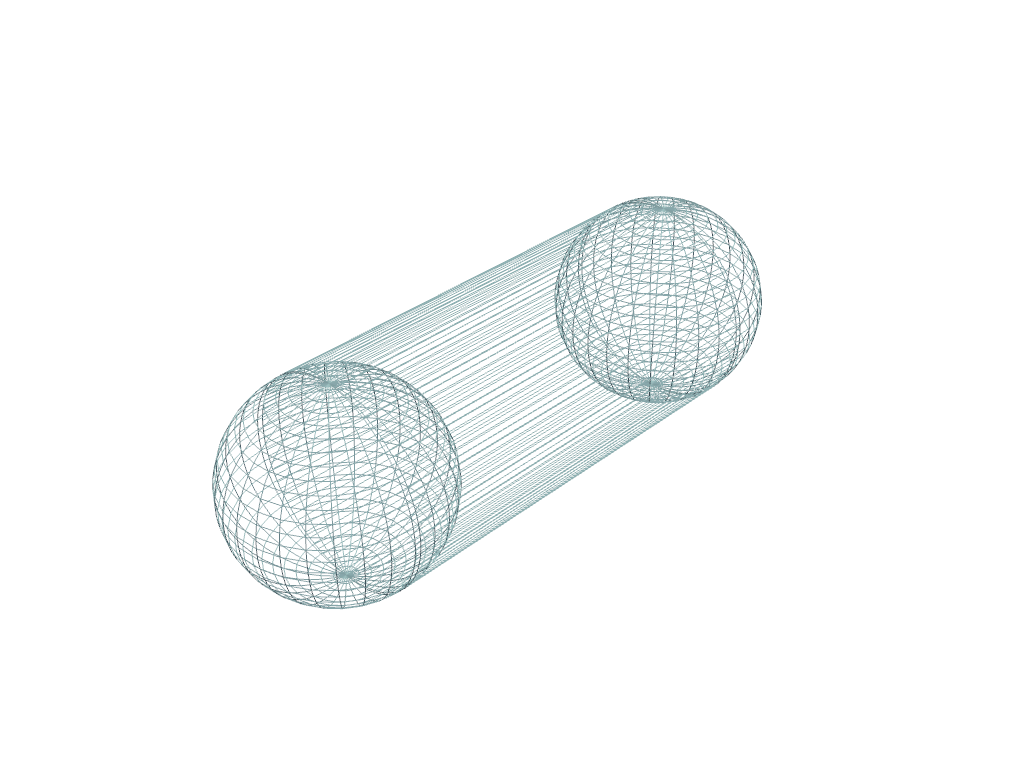

In [28]:
p = pv.Plotter()
p.add_mesh(cap, style='wireframe')
p.show()

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


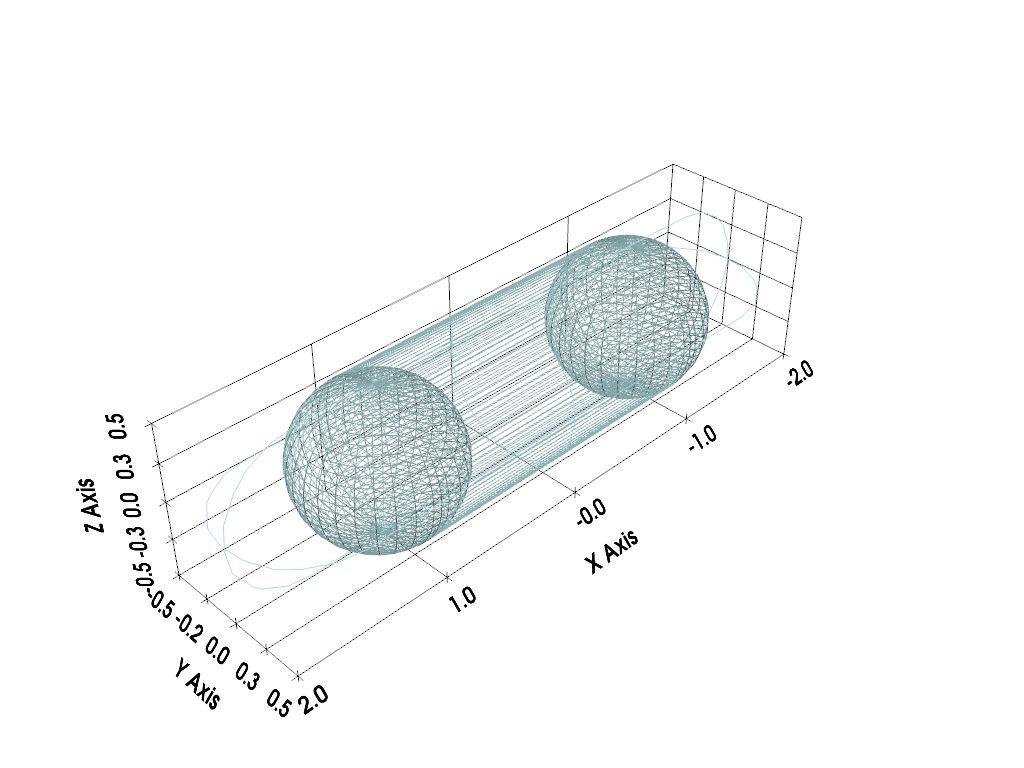

In [25]:

p.add_mesh(cap, style='wireframe')
p.show()

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


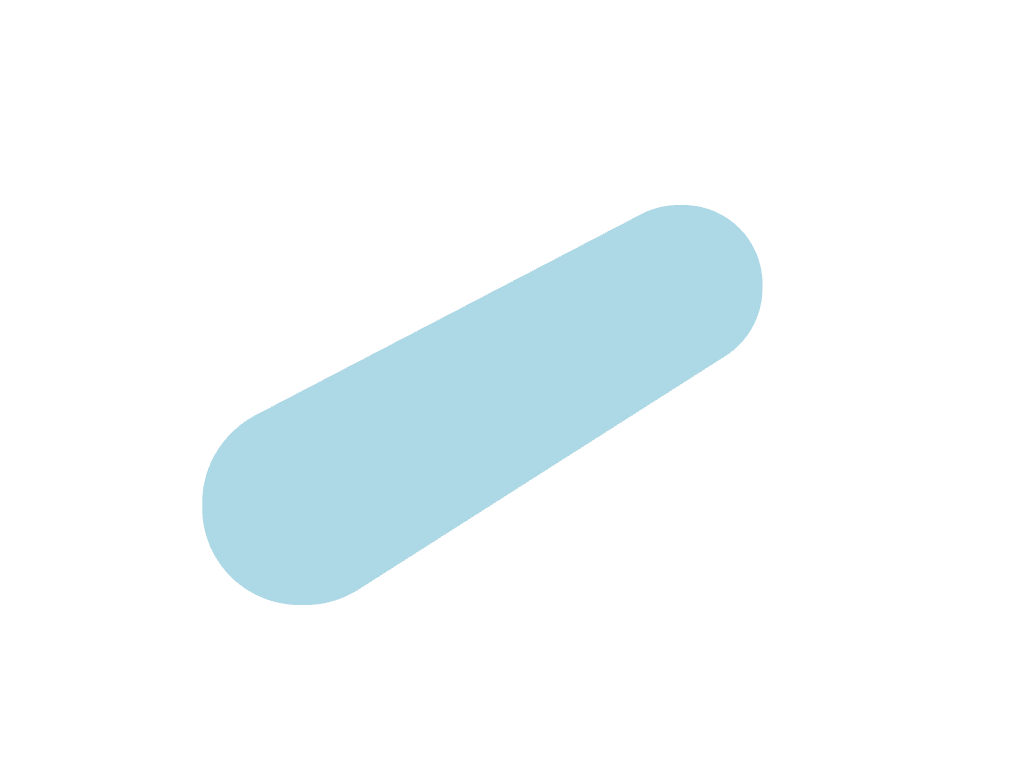

In [34]:
p = pv.Plotter()
p.add_mesh(inter)
p.add_mesh(coords)
p.show()

In [155]:
dL_PARAM = 2.0
R = 0.5

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


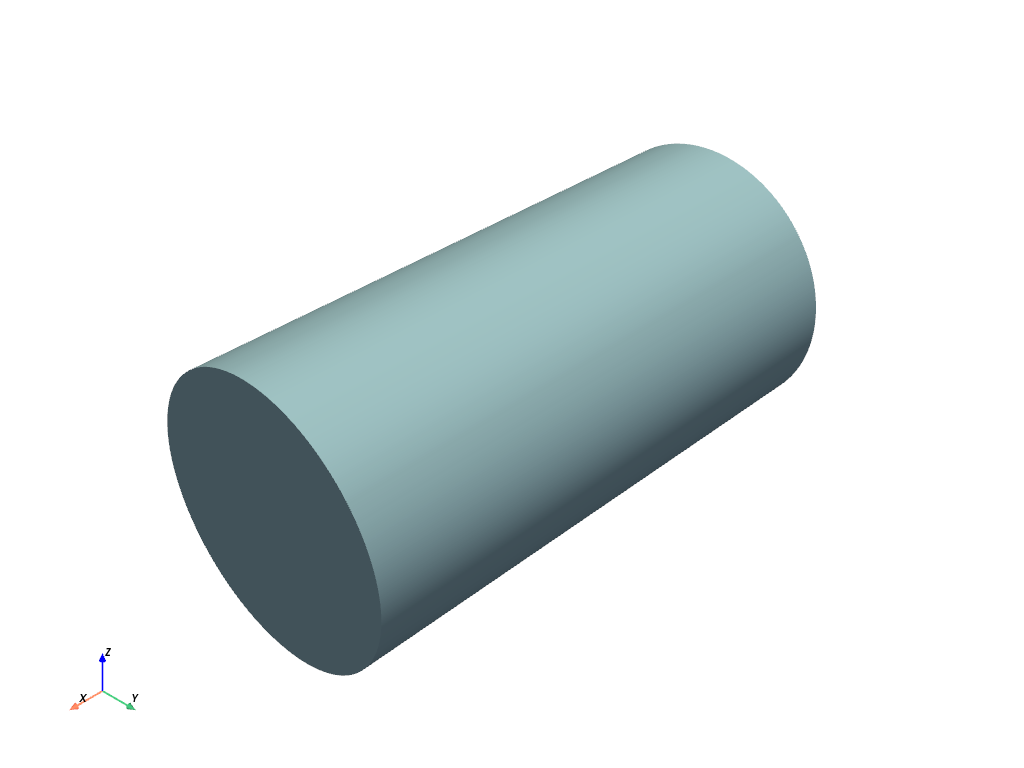

In [168]:
cyl = pv.Cylinder(resolution=100_000_000, radius=R, height=L_PARAM)

cyl.plot()

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


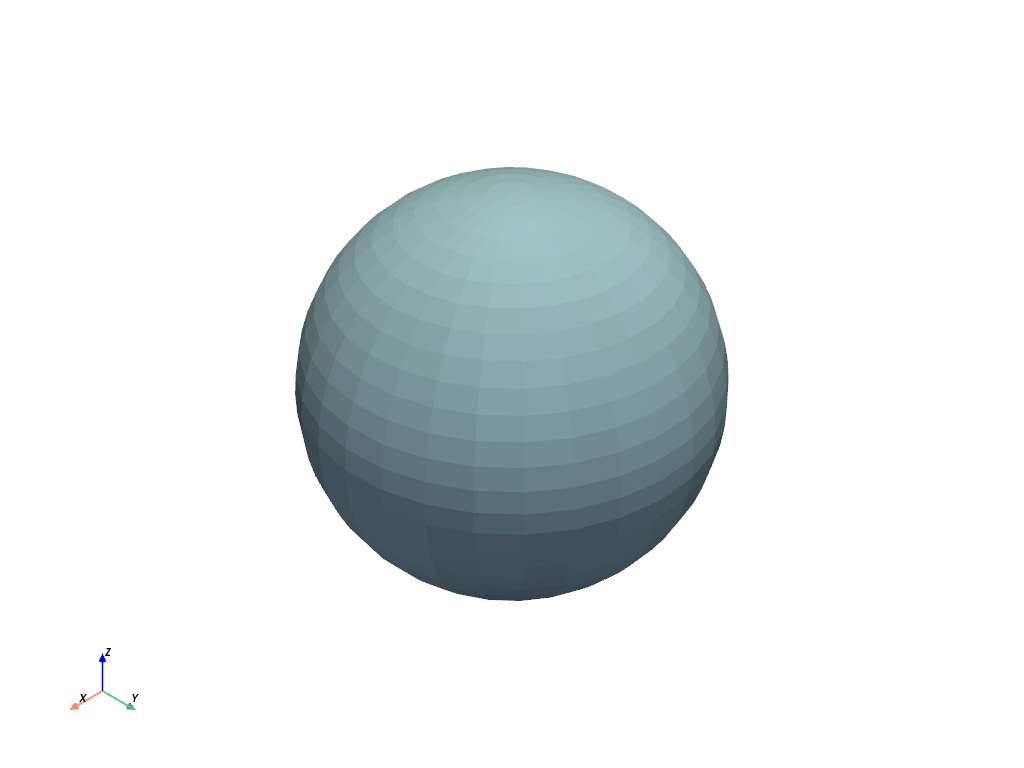

In [169]:

hemisphere1 = pv.Sphere(radius=R, center=(0, 0, L_PARAM))

hemisphere1.plot()

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


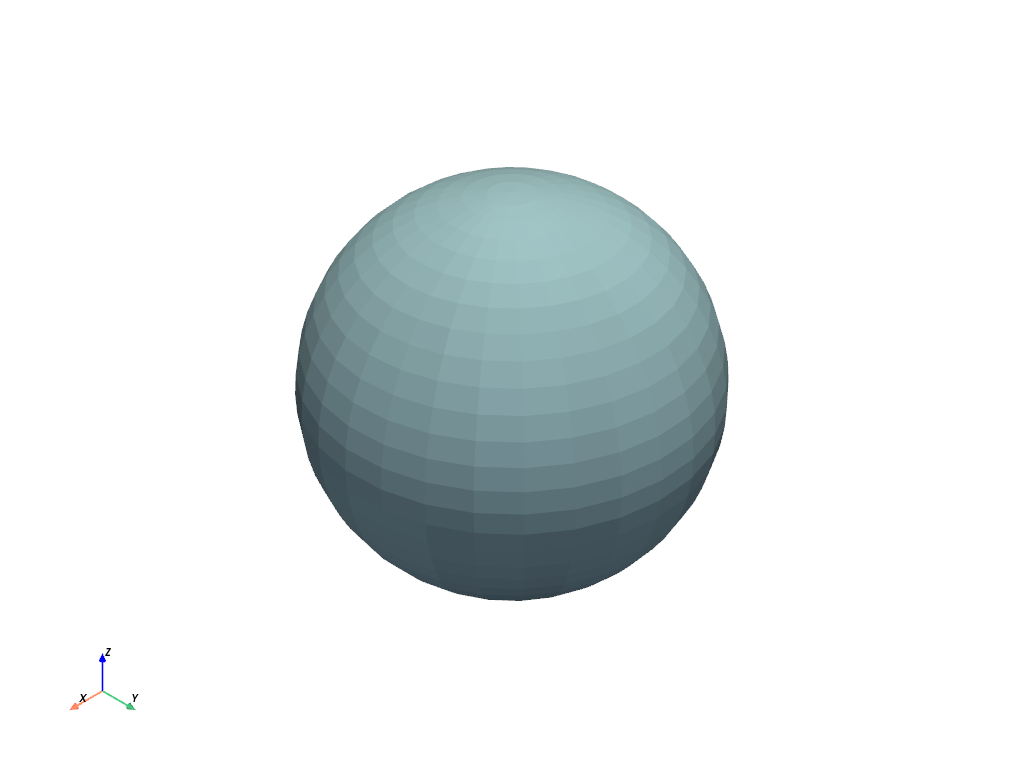

In [170]:
hemisphere2 = pv.Sphere(radius=R, center=(0, 0, -L_PARAM))
hemisphere2.plot()

In [171]:
sim.count()

{'compartment': 1,
 'dim': 3,
 'functions': 0,
 'species': 5,
 'surface': 1,
 'variables': 5}

In [172]:
capsule = cyl.merge(hemisphere1).merge(hemisphere2)

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


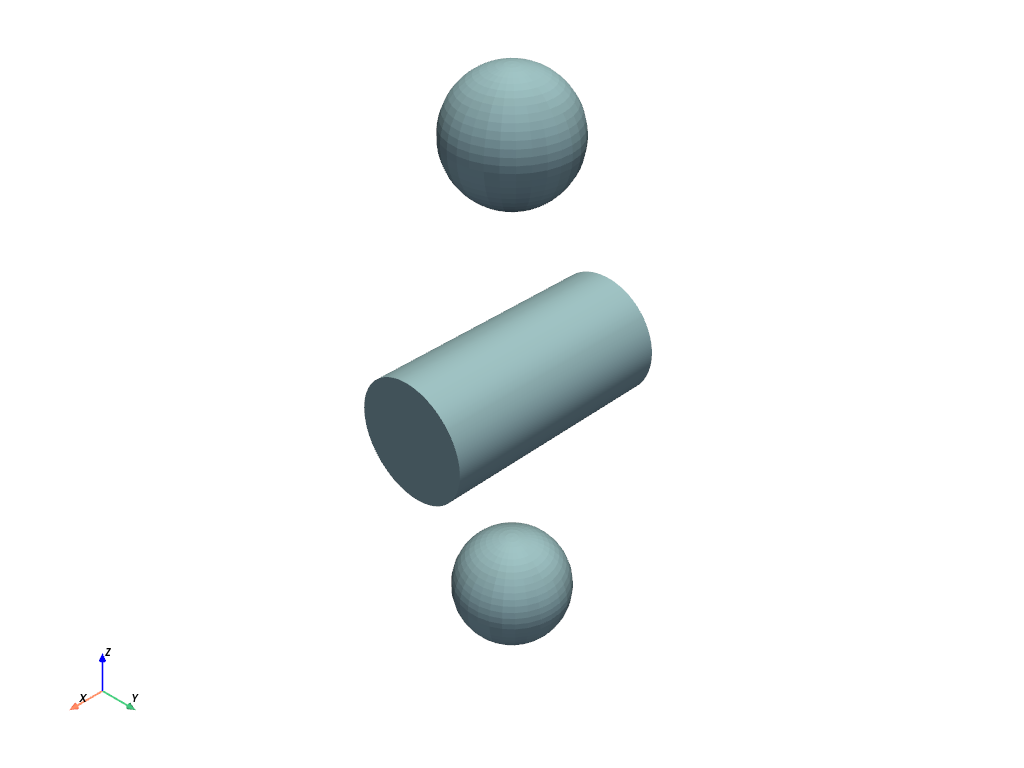

In [173]:
capsule.plot()

In [90]:
c
hemi1 = pv.Sphere()
hemi2 = pv.Sphere()
composite = cyl.merge(hemi1).merge(hemi2)


/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


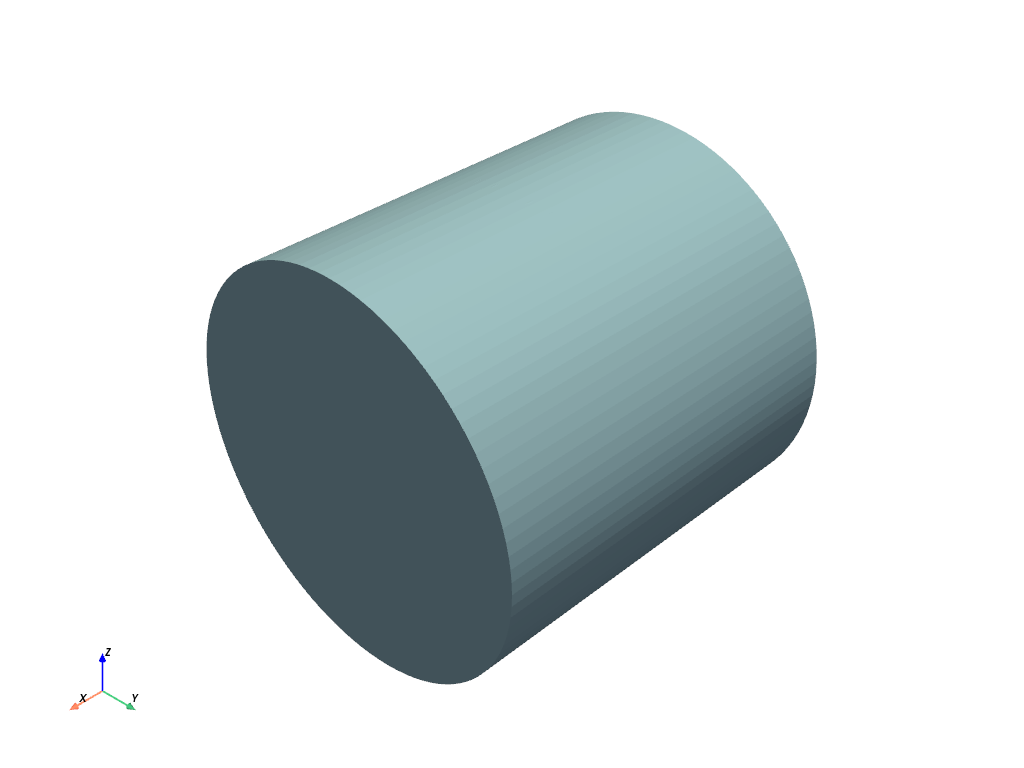

In [94]:
composite.plot()

In [38]:
combined_mesh = construct_capsule()

combined_mesh

PolyData (0x2ae68a500)
  N Cells:    3462
  N Points:   1884
  N Strips:   0
  X Bounds:   -5.000e-01, 5.000e-01
  Y Bounds:   -5.000e-01, 5.000e-01
  Z Bounds:   -2.500e+00, 2.500e+00
  N Arrays:   1

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


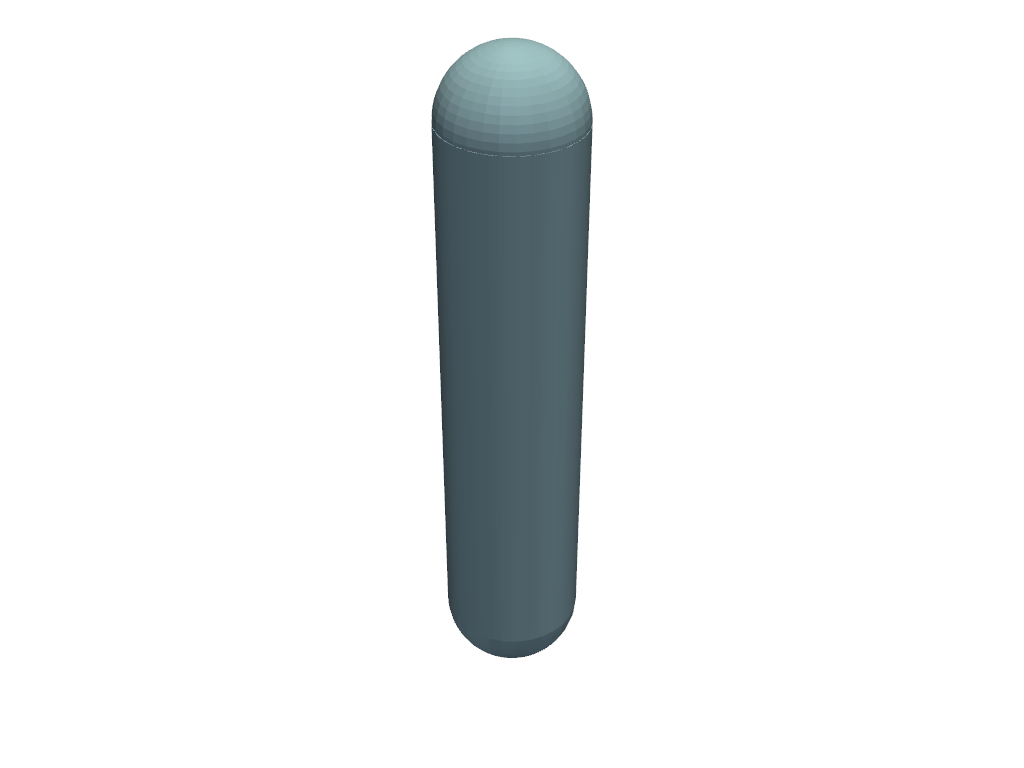

In [12]:
plotter = pv.Plotter()
plotter.add_mesh(combined_mesh, color='lightblue')
plotter.show()

In [14]:
interp = combined_mesh.interpolate(points)

In [15]:
interp

PolyData (0x2a999c520)
  N Cells:    3462
  N Points:   1884
  N Strips:   0
  X Bounds:   -5.000e-01, 5.000e-01
  Y Bounds:   -5.000e-01, 5.000e-01
  Z Bounds:   -2.500e+00, 2.500e+00
  N Arrays:   1

In [16]:
p = pv.Plotter()

p.add_volume(interp, **dargs)
p.add_mesh(points)
p.show()

TypeError: Type <class 'pyvista.core.pointset.PolyData'> not supported for volume rendering as it is not 3D.

In [20]:
point_cloud = pv.PolyData(output['coordinates'][:1000])

In [23]:
interpolated = combined_mesh.interpolate(point_cloud)

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


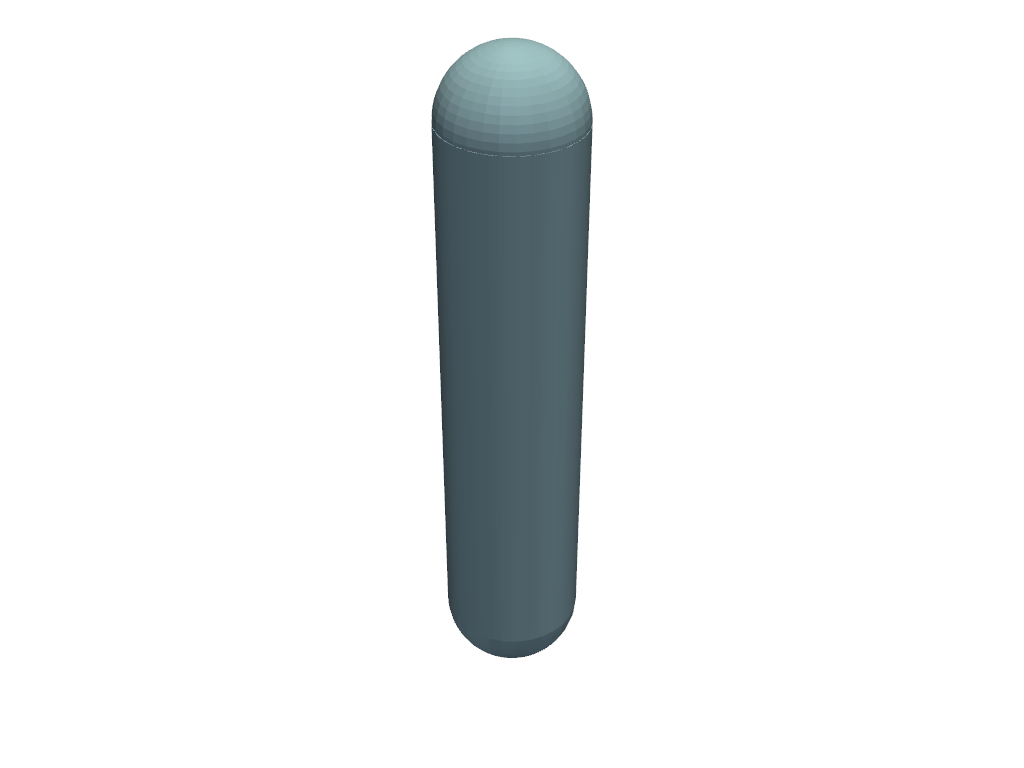

In [24]:
p = pv.Plotter()
p.add_mesh(interpolated)
p.show()

In [27]:
points.points

pyvista_ndarray([[ 1.24883513,  0.09081813, -0.49168289],
                 [ 1.65143897, -0.00526927,  0.47648554],
                 [-1.32350039, -0.19972966, -0.45837546],
                 ...,
                 [-1.30895329,  0.10745682, -0.48831653],
                 [-1.55965922, -0.19781855, -0.45531154],
                 [-1.32323105,  0.28259661,  0.41247928]])

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


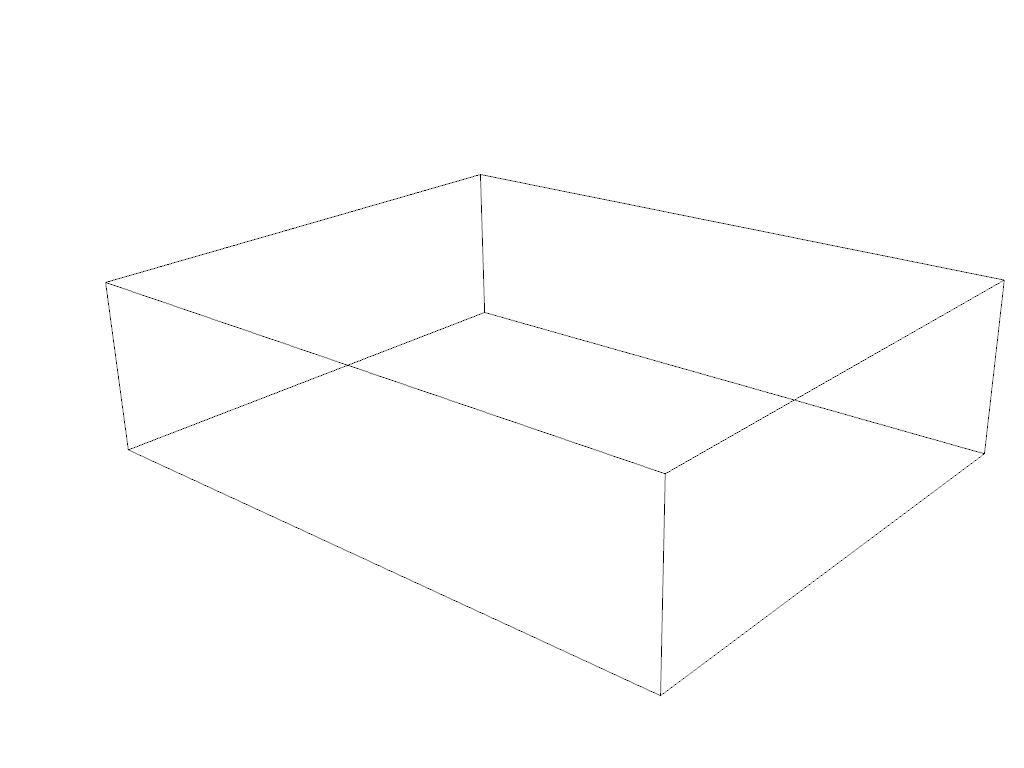

In [31]:
grid = pv.ImageData()
grid.origin = (329700, 4252600, -2700)
grid.spacing = (250, 250, 50)
grid.dimensions = (60, 75, 100)
dargs = dict(cmap="coolwarm", clim=[0, 300])
cpos = [
    (364280.5723737897, 4285326.164400684, 14093.431895014139),
    (337748.7217949739, 4261154.45054595, -637.1092549935128),
    (-0.29629216102673206, -0.23840196609932093, 0.9248651025279784),
]

p = pv.Plotter()
p.add_mesh(grid.outline(), color='k')
p.add_mesh(coords, render_points_as_spheres=True, **dargs)
p.show(cpos=cpos)

In [32]:
coords

array([[ 1.24883513,  0.09081813, -0.49168289],
       [ 1.65143897, -0.00526927,  0.47648554],
       [-1.32350039, -0.19972966, -0.45837546],
       ...,
       [-1.30895329,  0.10745682, -0.48831653],
       [-1.55965922, -0.19781855, -0.45531154],
       [-1.32323105,  0.28259661,  0.41247928]])

In [33]:
# Load a simple example mesh
dataset = examples.load_uniform()
dataset.set_active_scalars("Spatial Cell Data")

(<FieldAssociation.CELL: 1>,
 pyvista_ndarray([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
                    0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,
                    0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,
                    0.,   4.,   8.,

In [34]:
dataset

ImageData (0x2ae68ba00)
  N Cells:      729
  N Points:     1000
  X Bounds:     0.000e+00, 9.000e+00
  Y Bounds:     0.000e+00, 9.000e+00
  Z Bounds:     0.000e+00, 9.000e+00
  Dimensions:   10, 10, 10
  Spacing:      1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:     2

In [35]:
combined_mesh.points

pyvista_ndarray([[ 0.        ,  0.        , -1.5       ],
                 [ 0.        ,  0.        , -2.5       ],
                 [ 0.05405951,  0.        , -1.502931  ],
                 ...,
                 [-0.06266662,  0.49605736,  2.        ],
                 [-0.03139526,  0.49901336, -2.        ],
                 [-0.03139526,  0.49901336,  2.        ]], dtype=float32)

In [39]:
points = pv.wrap(combined_mesh.points)
surf = points.reconstruct_surface()

In [40]:
surf

PolyData,Information
N Cells,1605
N Points,863
N Strips,0
X Bounds,"-7.769e-01, 6.076e-01"
Y Bounds,"-7.769e-01, 6.076e-01"
Z Bounds,"-2.494e+00, 2.623e+00"
N Arrays,0


/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


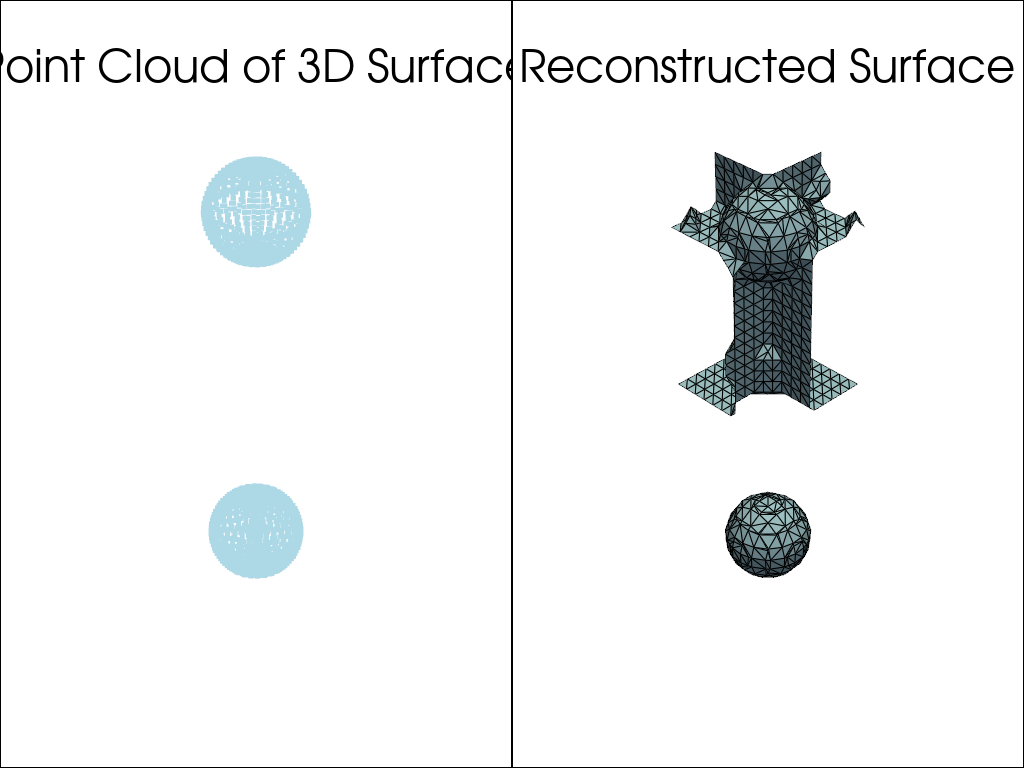

In [41]:
pl = pv.Plotter(shape=(1, 2))
pl.add_mesh(points)
pl.add_title('Point Cloud of 3D Surface')
pl.subplot(0, 1)
pl.add_mesh(surf, color=True, show_edges=True)
pl.add_title('Reconstructed Surface')
pl.show()

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


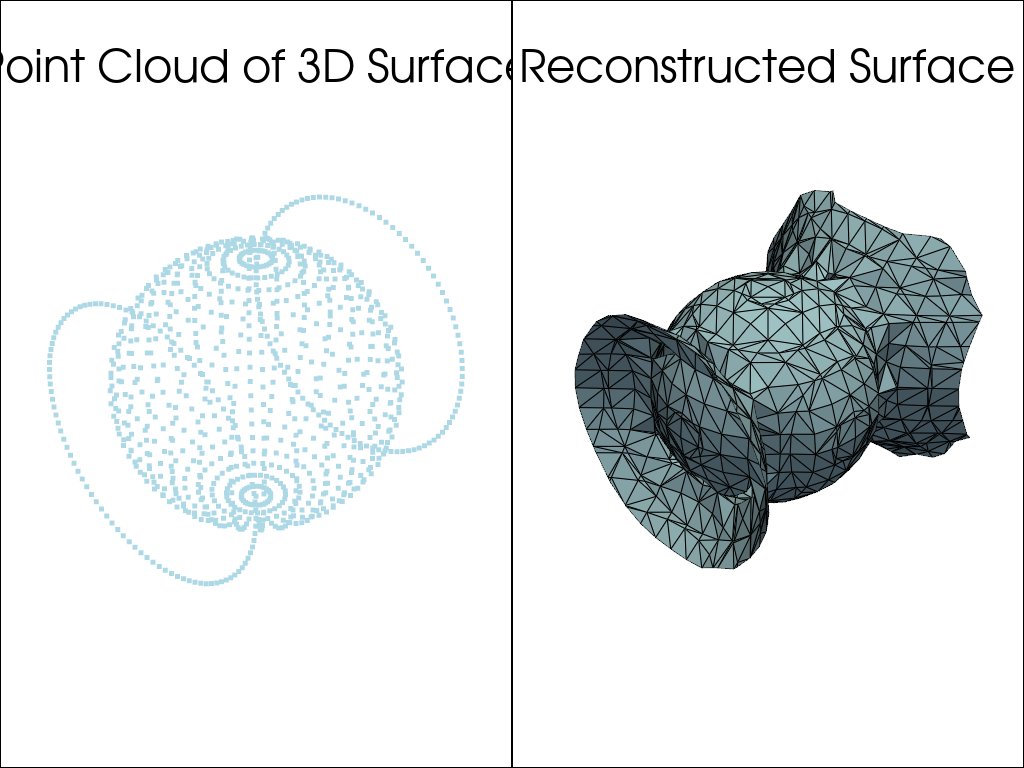

In [43]:
hemisphere1 = pv.Sphere()
hemisphere2 = pv.Sphere()
cyl = pv.Cylinder()
combined = cyl.merge(hemisphere1).merge(hemisphere2)
points = pv.wrap(combined.points)
surf = points.reconstruct_surface()
pl = pv.Plotter(shape=(1, 2))
pl.add_mesh(points)
pl.add_title('Point Cloud of 3D Surface')
pl.subplot(0, 1)
pl.add_mesh(surf, color=True, show_edges=True)
pl.add_title('Reconstructed Surface')
pl.show()

In [44]:
pv.Plotter()

AttributeError: 'Actor' object has no attribute 'show'

In [47]:
boundsHigh, boundsLow

([2, 0, 0], [-2, 0, 0])

In [48]:
bounds

([-2.0, -0.5, -0.5], [2.0, 0.5, 0.5])

In [63]:
# meshgrid 
import numpy as np 


x = np.linspace(bounds[0][0], bounds[1][0])
y = np.linspace(bounds[0][1], bounds[1][1])
z = np.linspace(bounds[0][2], bounds[1][2])

In [64]:
x, y, z

(array([-2.        , -1.91836735, -1.83673469, -1.75510204, -1.67346939,
        -1.59183673, -1.51020408, -1.42857143, -1.34693878, -1.26530612,
        -1.18367347, -1.10204082, -1.02040816, -0.93877551, -0.85714286,
        -0.7755102 , -0.69387755, -0.6122449 , -0.53061224, -0.44897959,
        -0.36734694, -0.28571429, -0.20408163, -0.12244898, -0.04081633,
         0.04081633,  0.12244898,  0.20408163,  0.28571429,  0.36734694,
         0.44897959,  0.53061224,  0.6122449 ,  0.69387755,  0.7755102 ,
         0.85714286,  0.93877551,  1.02040816,  1.10204082,  1.18367347,
         1.26530612,  1.34693878,  1.42857143,  1.51020408,  1.59183673,
         1.67346939,  1.75510204,  1.83673469,  1.91836735,  2.        ]),
 array([-0.5       , -0.47959184, -0.45918367, -0.43877551, -0.41836735,
        -0.39795918, -0.37755102, -0.35714286, -0.33673469, -0.31632653,
        -0.29591837, -0.2755102 , -0.25510204, -0.23469388, -0.21428571,
        -0.19387755, -0.17346939, -0.15306122, -0

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


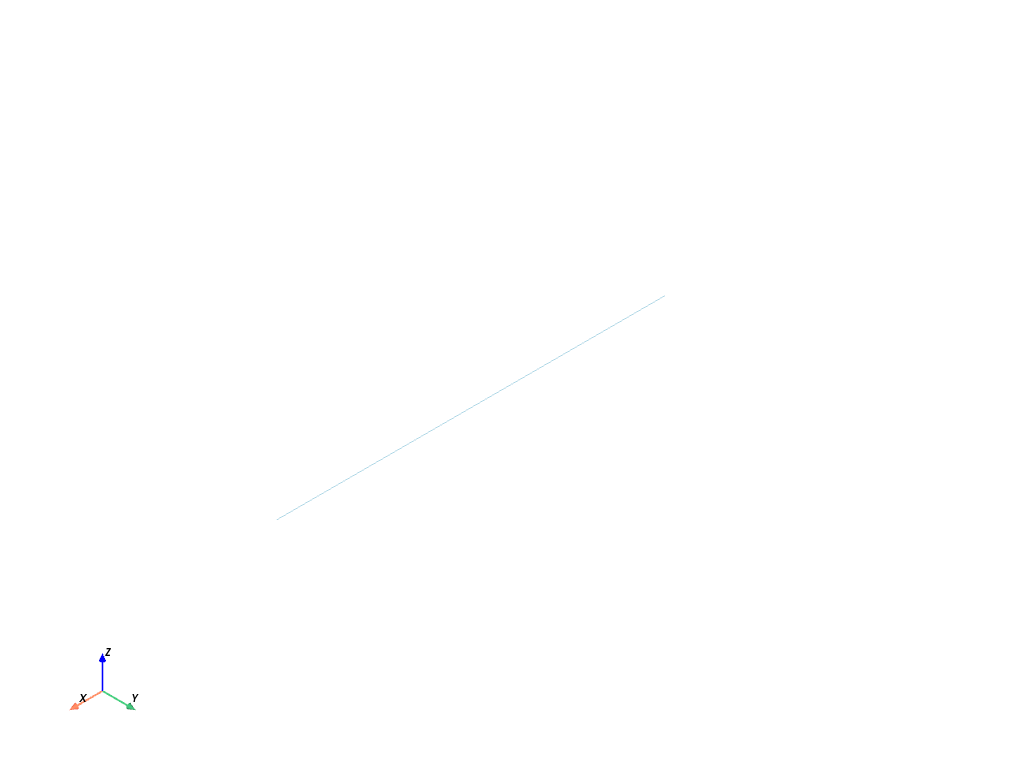

In [65]:
grid = pv.StructuredGrid(x, y, z)
grid.plot()

In [67]:
x, y, z = np.meshgrid(x, y, z)

In [70]:
# Create and plot structured grid
grid = pv.PolyData(np.array([x, y, z]))
grid.plot()

ValueError: Dimension of ``points`` should be 1 or 2, not 4

In [74]:
points = pv.PolyData(coords).points

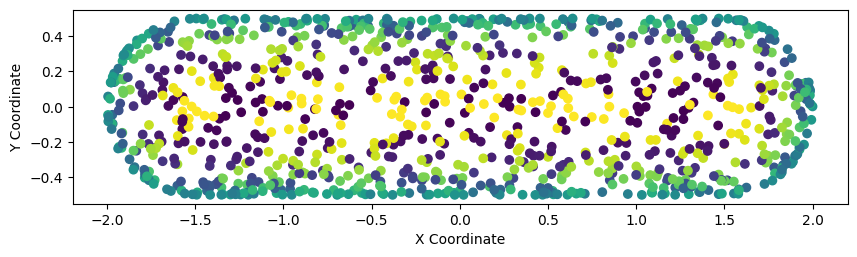

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1], c=points[:, 2])
plt.axis("image")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


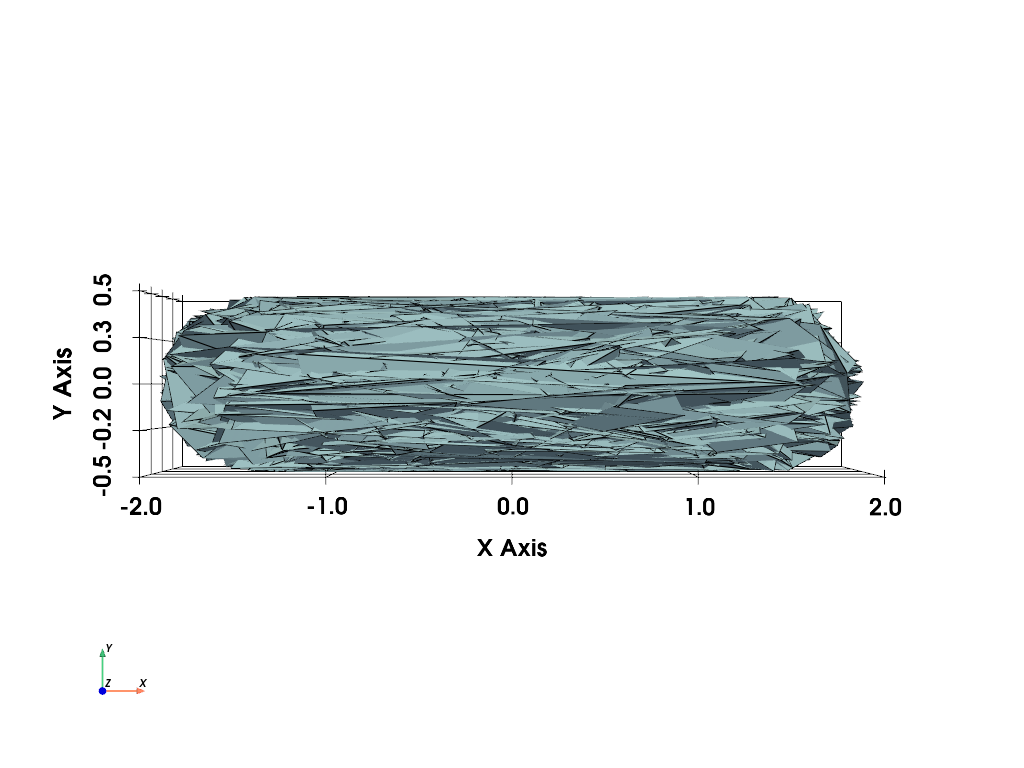

In [80]:
mesh = pv.StructuredGrid()
# Set the coordinates from the numpy array
mesh.points = points
# set the dimensions
mesh.dimensions = [29, 32, 1]

# and then inspect it
mesh.plot(show_edges=True, show_grid=True, cpos="xy")

In [81]:
from biosimulators_simularium.simulation_data import get_axis

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


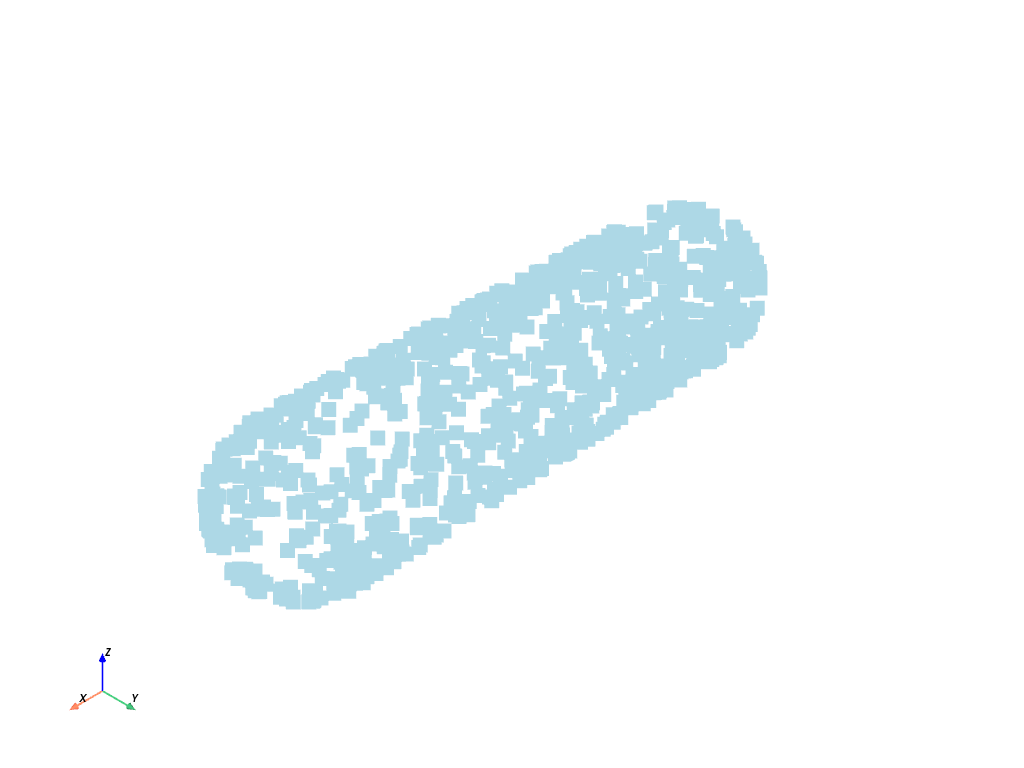

In [82]:
cloud = pv.PolyData(points)
cloud.plot(point_size=15)

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulators-simularium-jVbtrBpi-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


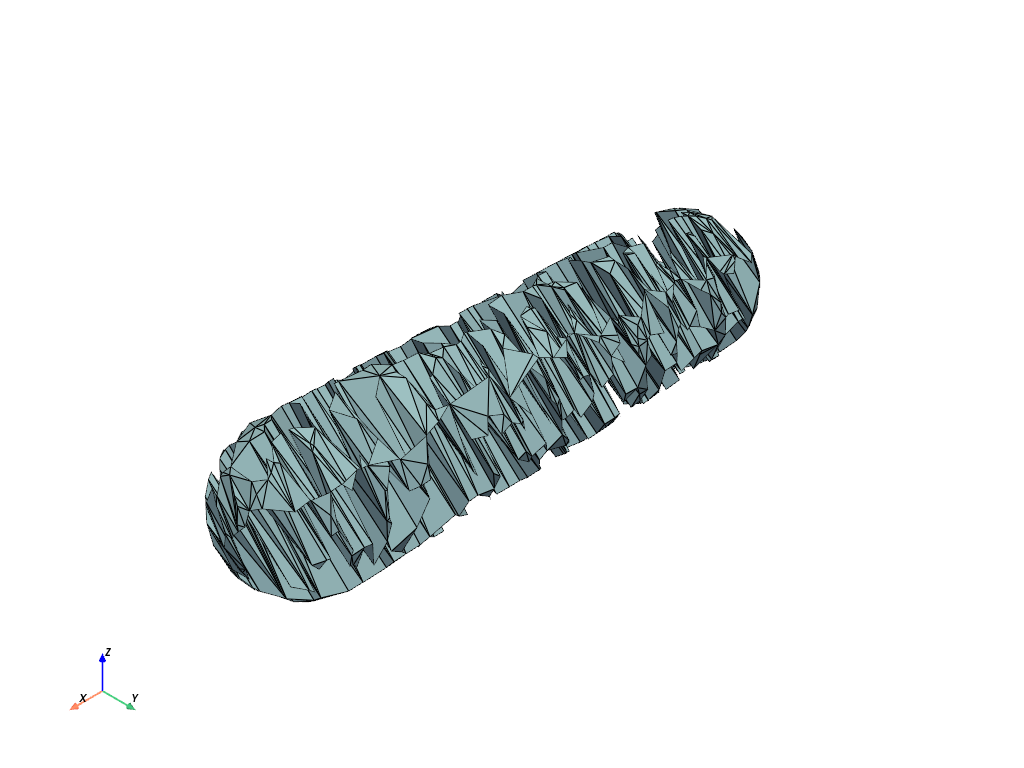

In [83]:
surf = cloud.delaunay_2d()
surf.plot(show_edges=True)

In [86]:
grid = pv.UnstructuredGrid(coords)

TypeError: Cannot work with input type <class 'numpy.ndarray'>

In [1]:
import datetime
from biosimulators_utils.ref.utils import get_reference
import Bio.Entrez

In [2]:
Bio.Entrez.email = 'john.doe@university.edu'